In [16]:
# entry point to spark connection to the cluster

from pyspark import SparkContext, SparkConf
sc = SparkContext.getOrCreate()

In [17]:
sc

<SparkContext master=spark://jkg-deployment-255ef21b-35c9-4828-aa07-814aa4f04cf0-5cf9f8h6hfd:7077 appName=pyspark-shell>

In [18]:
sc.version

'2.3.4'

### Functional Programming 

In python we have:</br>
-lambda function </br>
-map functions: applies a function to every element </br>
-filter tests every element and returns true or false </br>
-list comprehensions

In [75]:
### Functional programming in Python ###

# the standard for loop
a = []
for i in range(10):
    a.append(i+2)

print('standard for-loop')
print(a)
print('')

### the list comprehension

print('the list comprehension')
print([i+2 for i in range(10)])

print('')


### lambda function in action --> syntax "a function that takes x and returns..."

print('lambda')
print([(lambda x: x + 2)(i) for i in range(10)])

print('')

### OR ###

print('lambda as a one line function')
f = lambda x: x + 2
print([f(i) for i in range(10)])

print('')
### OR Now w/map ###

print('applying lambda to all elements using map')
l = list(range(10))
print([i for i in map(lambda x: 2 + x, l)])
print('')

### USE FILTER TO ADD 2 TO EVEN NUMBERS ###

print('filter only even numbers and apply to each element using map')
[i for i in map(lambda x: x + 2, filter(lambda x: x % 2 == 0, l))]

standard for-loop
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

the list comprehension
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

lambda
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

lambda as a one line function
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

applying lambda to all elements using map
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

filter only even numbers and apply to each element using map


[2, 4, 6, 8, 10]

### Working with RDDs

RDD stands for Resilent Distributed Datasets. </br>

Some features of RDDs: </br>
-They are immutable </br>
-Distributed across the cluster: The data is partitioned and fed to different nodes across the cluster enabling the ability to conduct parallel operations. </br>
-Creation of RDDs can be done by loading a file using a spark context method such as a csv, or by passing a list to the parallelize method. </br>

### Operations
-Transformation: What you do to an RDD to get another RDD (filter or union), always return RDD </br>
-Actions: Return a result to a driver program or write it to storage (collect(), count(), first(), take()) return some other data type </br>

### Transformations
-Basic RDD transformations: Map, Filter, Flatmap


### Create an RDD and use transformations

spark transformations are "lazy" i.e. they do not compute their results right away, thus we need to add an action to it such as ".collect()"

In [94]:
# applying map to add 2 to each element

rdd_list = list(range(10))
rdd = sc.parallelize(rdd_list)
rdd.map(lambda x: x+2).collect() # get results with .collect()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [98]:
# apply filter to get only even numbers and then adding two to each element 

rdd_fil = rdd.filter(lambda x: x % 2 == 0)
rdd_fil.map(lambda x: x+2).collect()

[2, 4, 6, 8, 10]

In [101]:
# split individuals words using flatmap

text = sc.parallelize(['Hello world!'])
text.flatMap(lambda x: x.split(' ')).collect()

['Hello', 'world!']

### Manipulate data from a data source: Pandas v. Spark

In [103]:
!pip install --upgrade wget
import wget

#cus_churn_url = 'https://raw.githubusercontent.com/pmservice/wml-sample-models/master/spark/customer-satisfaction-prediction/data/Telco_customer_churn.csv'
jh_covid_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-26-2020.csv'

data = wget.download(jh_covid_url)

print(data)

  Stored in directory: /home/spark/shared/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
06-26-2020.csv


In [104]:
import pandas as pd
from pyspark.sql import SparkSession


### Peeking at the data

In [105]:
df = pd.read_csv('06-26-2020.csv'); df.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-27 04:33:35,34.223334,-82.461707,100,0,0,100,"Abbeville, South Carolina, US",407.713948,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-27 04:33:35,30.295065,-92.414197,783,36,0,747,"Acadia, Louisiana, US",1261.987267,4.597701


In [107]:
spark = SparkSession.builder.getOrCreate()

spark_df = spark.read\
    .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
    .option('header', 'true')\
    .option('inferSchema', 'true')\
    .option('nanValue', ' ')\
    .option('nullValue', ' ')\
    .load(data)


In [108]:
spark_df.show(2)

+-----+---------+--------------+--------------+-------------------+-----------+------------+---------+------+---------+------+--------------------+------------------+-------------------+
| FIPS|   Admin2|Province_State|Country_Region|        Last_Update|        Lat|       Long_|Confirmed|Deaths|Recovered|Active|        Combined_Key|    Incidence_Rate|Case-Fatality_Ratio|
+-----+---------+--------------+--------------+-------------------+-----------+------------+---------+------+---------+------+--------------------+------------------+-------------------+
|45001|Abbeville|South Carolina|            US|2020-06-27 04:33:35|34.22333378|-82.46170658|      100|     0|        0|   100|Abbeville, South ...|407.71394789415746|                0.0|
|22001|   Acadia|     Louisiana|            US|2020-06-27 04:33:35| 30.2950649|-92.41419698|      783|    36|        0|   747|Acadia, Louisiana...|1261.9872673059876|  4.597701149425287|
+-----+---------+--------------+--------------+------------------

### Basic operations on columns

In [110]:
# summations

df['Deaths'].sum()

494181

In [113]:
spark_df.select('Deaths').show(5) # select is a transformation show is an action

+------+
|Deaths|
+------+
|     0|
|    36|
|    14|
|    23|
|     0|
+------+
only showing top 5 rows



In [116]:
spark_df.select('Deaths').groupby().sum().collect()

[Row(sum(Deaths)=494181)]

### Mean

In [140]:
df['Deaths'].mean()

130.66657852987836

In [139]:
spark_df.select('Deaths').groupby().mean().collect()

[Row(avg(Deaths)=130.66657852987836)]

### Row selection based on criteria

return states with deaths > 10K 

In [220]:

#x = df[df['Deaths'].apply(lambda x: x>10000)]
#[c for c in x if x.endswith('Province_State','Deaths')]

cols = [c for c in df.columns if c.startswith(('Province_State','Deaths'))]
sort_df = df[cols]

sort_df[sort_df['Deaths'].apply(lambda x: x>10000)]

,Province_State,Deaths
2003,New York,22421
3227,England,38888
3347,Lombardia,16624
3497,Sao Paulo,13966
3669,NaN,29705
3686,NaN,10239


In [185]:
spark_df.select('Province_State','Deaths').rdd.filter(lambda x: x[1]>10000).collect()

[Row(Province_State='New York', Deaths=22421),
 Row(Province_State='England', Deaths=38888),
 Row(Province_State='Lombardia', Deaths=16624),
 Row(Province_State='Sao Paulo', Deaths=13966),
 Row(Province_State=None, Deaths=29705),
 Row(Province_State=None, Deaths=10239)]

### Data Visualization/Data Exploration

In [224]:
spark_df.select('Province_State','Deaths').describe().show()

+-------+---------------+------------------+
|summary| Province_State|            Deaths|
+-------+---------------+------------------+
|  count|           3613|              3782|
|   mean|           null|130.66657852987836|
| stddev|           null|1076.5525030711194|
|    min|        Abruzzo|                 0|
|    max|Zhytomyr Oblast|             38888|
+-------+---------------+------------------+



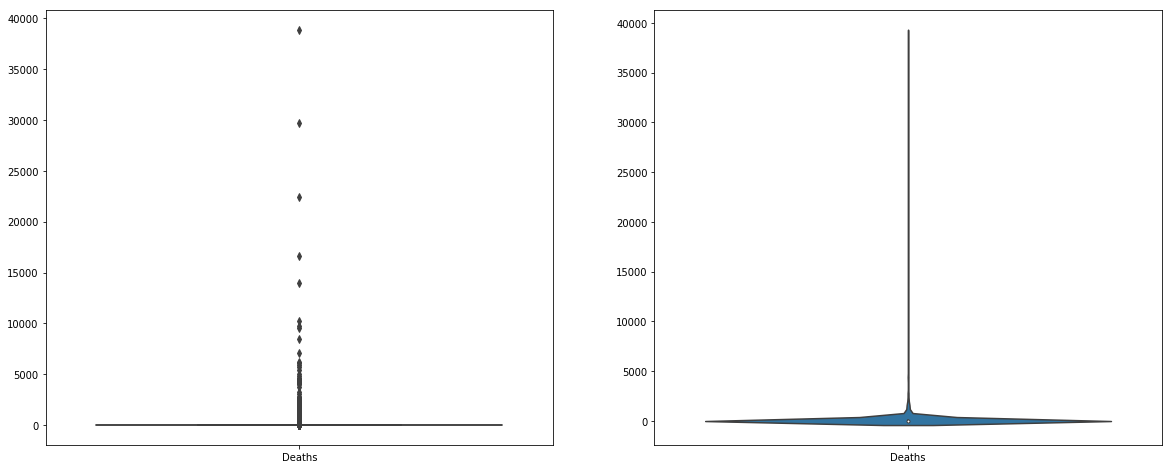

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

deaths_viz = spark_df.select('Province_State','Deaths').toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=deaths_viz)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=deaths_viz)

### Use SQL

In [241]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [242]:
spark_df.registerTempTable("jh_sql_data")

In [243]:
temp_df =  sqlContext.sql("select * from jh_sql_data")

In [247]:
sqlContext.sql("select Province_State, Deaths from jh_sql_data limit 10").toPandas()

,Province_State,Deaths
0,South Carolina,0
1,Louisiana,36
2,Virginia,14
3,Idaho,23
4,Iowa,0
5,Kentucky,19
6,Missouri,0
7,Oklahoma,4
8,Colorado,154
9,Idaho,0


### Machine Learning

Predict customer churn on a fictional customer

In [248]:
link_to_data = 'https://raw.githubusercontent.com/pmservice/wml-sample-models/master/spark/customer-satisfaction-prediction/data/Telco_customer_churn.csv'
filename = wget.download(link_to_data)

print(filename)

Telco_customer_churn.csv


In [249]:
spark = SparkSession.builder.getOrCreate()
df_data = spark.read\
    .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
    .option('header', 'true')\
    .option('inferSchema', 'true')\
    .option('nanValue', ' ')\
    .option('nullValue', ' ')\
    .load(filename)

In [251]:
df_data.toPandas().head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


### Explore target variable


In [253]:
df_data.groupBy('Churn_Label').count().show()

+-----------+-----+
|Churn_Label|count|
+-----------+-----+
|         No| 5174|
|        Yes| 1869|
+-----------+-----+



### Multivariate Exploration

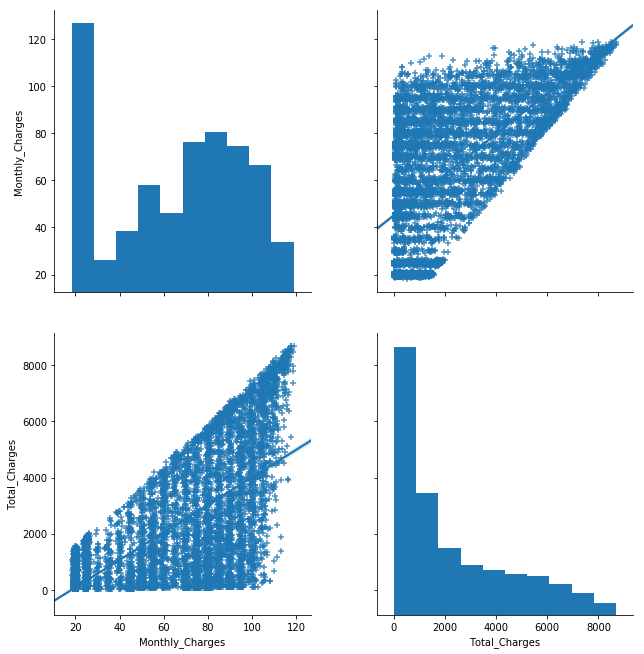

In [261]:
churn_df = df_data.toPandas()

import warnings
warnings.filterwarnings('ignore')

mul_var_df = churn_df[['Churn_Label', 'Monthly_Charges', 'Total_Charges']]

g=sns.pairplot(mul_var_df, kind='reg',markers='+')
g.fig.set_size_inches(10,10)

plt.show()

### Create a new feature

In [278]:
churn_df['churn_df_co'] = churn_df['Total_Charges'].apply(lambda x: 1 if x > 200 else 0)

pd.crosstab(churn_df['Churn_Label'], churn_df['churn_df_co'])

churn_df_co,0,1
Churn_Label,,
No,618,4556
Yes,574,1295


In [291]:
churn_df['churn_df_co'].head()

0    0
1    0
2    1
3    1
4    1
Name: churn_df_co, dtype: int64

In [290]:
from pyspark.sql import functions as f
new = df_data.withColumn('Total_Charges', f.when(f.col('Total_Charges') > 200, 1).otherwise(0))

new.select('Total_Charges').show(5)

+-------------+
|Total_Charges|
+-------------+
|            0|
|            0|
|            1|
|            1|
|            1|
+-------------+
only showing top 5 rows



### Split Data & drop NaN values

In [329]:
link_to_data = 'https://raw.githubusercontent.com/pmservice/wml-sample-models/master/spark/customer-satisfaction-prediction/data/Telco_customer_churn.csv'
filename = wget.download(link_to_data)

spark = SparkSession.builder.getOrCreate()
df_data = spark.read\
    .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
    .option('header', 'true')\
    .option('inferSchema', 'true')\
    .option('nanValue', ' ')\
    .option('nullValue', ' ')\
    .load(filename)

In [331]:
df_complete = df_data.dropna()

print('Number of records with complete data: %3g' % df_complete.count())

# (train_data, test_data, predict_data) = df_complete.randomSplit([0.8, 0.18, 0.02], 24)

# print('Number of records for training: {}'.format(train_data.count()))
# print('Number of records for evaluation: {}'.format(test_data.count()))
# print('Number of records for prediction: {}'.format(predict_data.count()))

Number of records with complete data: 7032
Number of records for training: 5621
Number of records for evaluation: 1263
Number of records for prediction: 148


In [332]:
from pyspark.ml.feature import StringIndexer, IndexToString, RFormula
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline, Model

### Create Categorical Features

In [340]:
formula = RFormula(
    formula="Churn_Label ~ Gender + Senior_Citizen + Partner",
    featuresCol="features",
    labelCol="label")

output = formula.fit(df_data).transform(df_data)
output.select("features", "label").show(5)

+-------------+-----+
|     features|label|
+-------------+-----+
|[1.0,1.0,1.0]|  1.0|
|[0.0,1.0,1.0]|  1.0|
|[0.0,1.0,1.0]|  1.0|
|[0.0,1.0,0.0]|  1.0|
|[1.0,1.0,1.0]|  1.0|
+-------------+-----+
only showing top 5 rows



### Instatiate the Model, train/test/split, and train the model

In [ ]:
lr = LogisticRegression(maxIter = 10)

In [342]:
train, test = df_data.randomSplit([0.8, 0.2], seed=23409)

In [343]:
model_lr = pipeline_lr.fit(train_data)

Model has good AUC score and thus showing decent seperability

In [344]:
predictions = model_lr.transform(test_data)
evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='rawPrediction')
auc = evaluator.evaluate(predictions)

print('Test dataset:')
print('Area Under the Curve = {:.2f}%'.format((auc*100)))

Test dataset:
Area Under the Curve = 85.97%
